In [35]:
import sys
import os
from pathlib import Path

from fastai.vision.all import *
from fastbook import *
from torchvision import transforms
import torchvision
import numpy as np
import pandas as pd

In [4]:
%matplotlib inline

# Training MNIST Classifier From Scratch

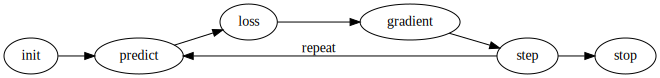

In [5]:
gv('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')

In [6]:
data_path = untar_data(URLs.MNIST)

In [7]:
data_path

Path('/home/kai/.fastai/data/mnist_png')

In [8]:
(data_path/'testing').ls()

(#10) [Path('/home/kai/.fastai/data/mnist_png/testing/5'),Path('/home/kai/.fastai/data/mnist_png/testing/4'),Path('/home/kai/.fastai/data/mnist_png/testing/2'),Path('/home/kai/.fastai/data/mnist_png/testing/7'),Path('/home/kai/.fastai/data/mnist_png/testing/3'),Path('/home/kai/.fastai/data/mnist_png/testing/0'),Path('/home/kai/.fastai/data/mnist_png/testing/8'),Path('/home/kai/.fastai/data/mnist_png/testing/9'),Path('/home/kai/.fastai/data/mnist_png/testing/1'),Path('/home/kai/.fastai/data/mnist_png/testing/6')]

In [9]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [77]:
simple_net = nn.Sequential(
    nn.Linear(28*28, 30),
    nn.ReLU(),
    nn.Linear(30,1)
)

## Create the Dataset
Create a batch of all training and test datasets X -> (28*28, n_training_samples), and Y -> len 10 vector for all possible digits. Do same with test

In [78]:
xforms = torchvision.transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Lambda(lambda x: torch.flatten(x))
])

In [79]:
train_folder = torchvision.datasets.ImageFolder(root=data_path/'training', transform=xforms)
test_folder = torchvision.datasets.ImageFolder(root=data_path/'testing', transform=xforms)
train_data = DataLoader(train_folder, batch_size=256, shuffle=True)
test_data = DataLoader(test_folder, batch_size=256, shuffle=True)

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,


In [44]:
first(train_data)

TypeError: 'module' object is not callable